In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import  r2_score,mean_absolute_error,mean_squared_log_error,median_absolute_error,explained_variance_score
from sklearn.metrics import mean_squared_error

In [2]:
# !pip install graphviz

In [3]:
original = pd.read_excel("../data/StockX-Data-Contest-2019.xlsx")
cleaned = pd.read_csv("../data/StockX-Data-Cleaned.csv")
trend = pd.read_csv("../data/google_trend.csv")
color = pd.read_excel("../data/StockX_Sneaker_Colorway.xlsx")

In [4]:
cleaned['style'] = original['Sneaker Name']

In [5]:
data = cleaned.merge(color, left_on = 'style', right_on = 'Style', how = 'left')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99956 entries, 0 to 99955
Data columns (total 38 columns):
Shoe Size             99956 non-null float64
Price Premium         99956 non-null float64
Days Since Release    99956 non-null float64
v2                    99956 non-null int64
airjordan             99956 non-null int64
airforce              99956 non-null int64
airmax90              99956 non-null int64
airmax97              99956 non-null int64
presto                99956 non-null int64
vapormax              99956 non-null int64
blazer                99956 non-null int64
zoom                  99956 non-null int64
California            99956 non-null int64
New York              99956 non-null int64
Oregon                99956 non-null int64
Florida               99956 non-null int64
Texas                 99956 non-null int64
Other States          99956 non-null int64
black                 99956 non-null int64
grey                  99956 non-null int64
white                 999

### TODO: group shoesize into different ranges

In [7]:
# Train-Test Splitting
x = data.drop(["Price Premium",'Website','Product Line','Colorful','Style','style'], axis=1)
y = data["Price Premium"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [8]:
x.head()

,Shoe Size,Days Since Release,v2,airjordan,airforce,airmax90,airmax97,presto,vapormax,blazer,...,White,Grey,Red,Green,Neo,Orange,Tan/Brown,Pink,Blue,Number of Sales
0,11.0,342.0,1,0,0,0,0,0,0,0,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1857
1,11.0,282.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,560
2,11.0,282.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,520
3,11.5,282.0,1,0,0,0,0,0,0,0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,808
4,11.0,202.0,1,0,0,0,0,0,0,0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2153


In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99956 entries, 0 to 99955
Data columns (total 32 columns):
Shoe Size             99956 non-null float64
Days Since Release    99956 non-null float64
v2                    99956 non-null int64
airjordan             99956 non-null int64
airforce              99956 non-null int64
airmax90              99956 non-null int64
airmax97              99956 non-null int64
presto                99956 non-null int64
vapormax              99956 non-null int64
blazer                99956 non-null int64
zoom                  99956 non-null int64
California            99956 non-null int64
New York              99956 non-null int64
Oregon                99956 non-null int64
Florida               99956 non-null int64
Texas                 99956 non-null int64
Other States          99956 non-null int64
black                 99956 non-null int64
grey                  99956 non-null int64
white                 99956 non-null int64
colorful              99956

In [10]:
x = x.fillna(0)
print(x_train.shape, x_test.shape)

(69969, 32) (29987, 32)


## Gradient Boosting RT

In [ ]:
gbrt=GradientBoostingRegressor(n_estimators=25) 
gbrt.fit(x_train, y_train)
y_pred=gbrt.predict(x_test)

## XGBoost

In [11]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [12]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [13]:
xg_reg.fit(x_train,y_train)
y_pred = xg_reg.predict(x_test)

[19:02:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [14]:
print('R²: %.2f' % r2_score(y_test, y_pred))
print("rmse: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("mean_absolute_error: %.2f" % mean_absolute_error(y_test, y_pred))
print("median_absolute_error: %.2f" % median_absolute_error(y_test, y_pred))
print("explained_variance_score: %.2f" % explained_variance_score(y_test, y_pred))

R²: 0.55
rmse: 1.01
mean_absolute_error: 0.59
median_absolute_error: 0.35
explained_variance_score: 0.58


### k-fold Cross Validation using XGBoost

In [15]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[19:02:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:02:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:02:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [16]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.625512,0.007868,1.625488,0.015892
1,1.545070,0.032830,1.546012,0.040118
2,1.456235,0.055197,1.456987,0.049305
3,1.372076,0.059003,1.372936,0.047218
4,1.278065,0.052900,1.279522,0.044551


In [17]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.44451
Name: test-rmse-mean, dtype: float64


In [18]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[19:03:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


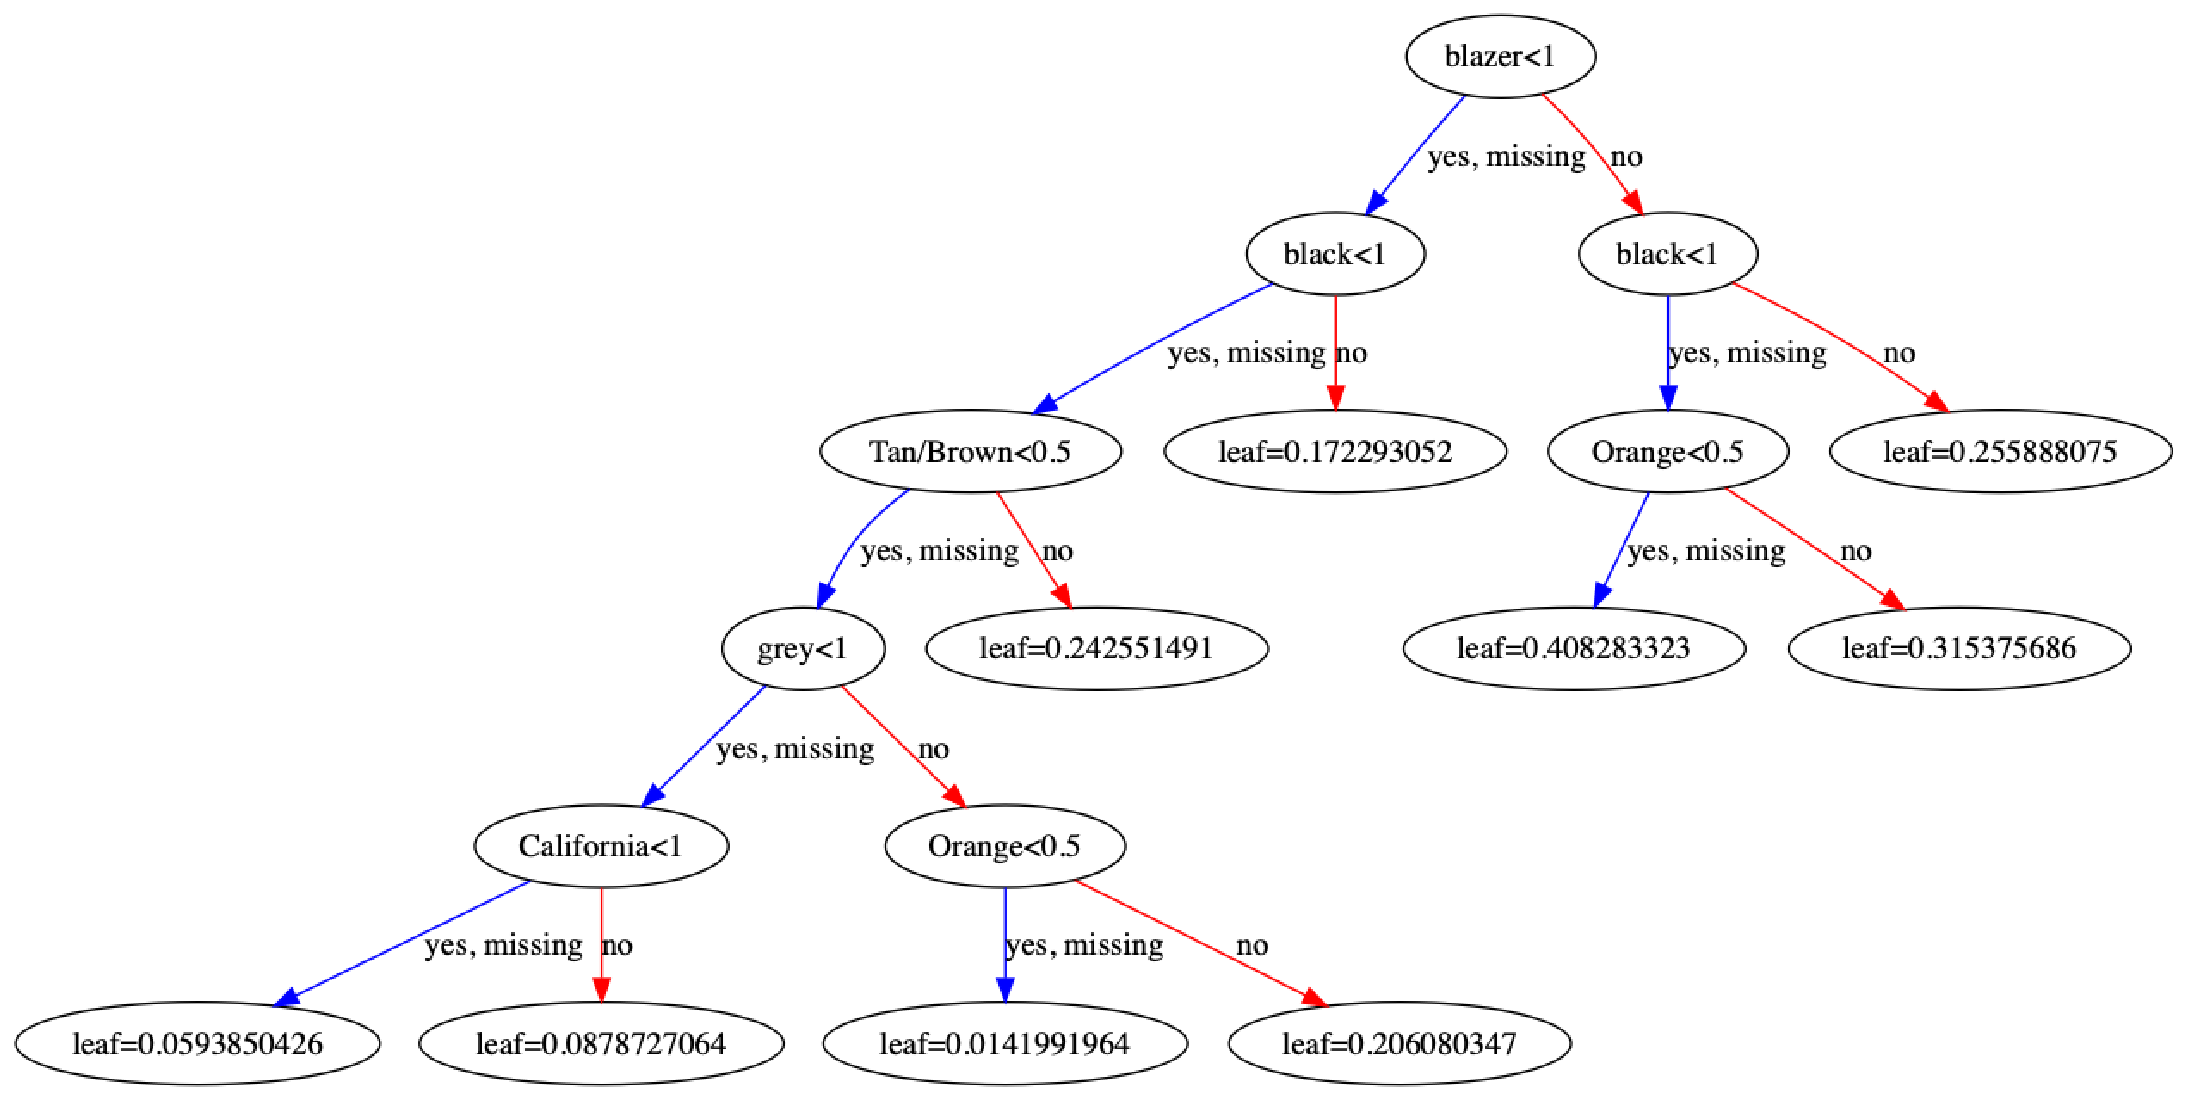

In [25]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 20]
plt.show()

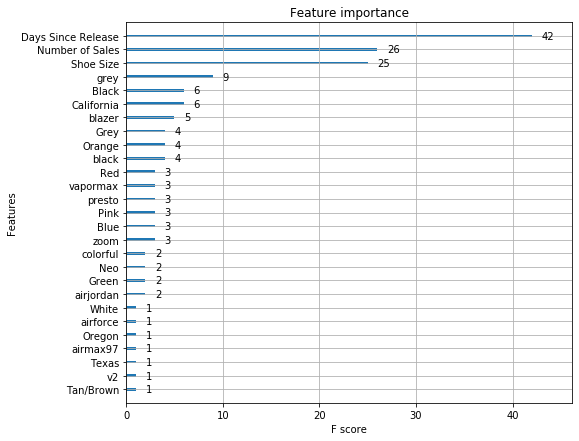

In [27]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10,8]
plt.show()